## Linear Regression Example

In [8]:
from __future__ import absolute_import, division, print_function

In [28]:
import tensorflow as tf
import numpy as np
rng = np.random

In [29]:
# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [30]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [31]:
# Weight and Bias, initialized randomly.
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [32]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [33]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.543926, W: 0.502012, b: -0.976262
step: 100, loss: 0.459759, W: 0.473360, b: -0.773131
step: 150, loss: 0.393753, W: 0.447987, b: -0.593246
step: 200, loss: 0.341989, W: 0.425517, b: -0.433946
step: 250, loss: 0.301395, W: 0.405619, b: -0.292875
step: 300, loss: 0.269560, W: 0.387998, b: -0.167948
step: 350, loss: 0.244594, W: 0.372393, b: -0.057317
step: 400, loss: 0.225015, W: 0.358574, b: 0.040653
step: 450, loss: 0.209661, W: 0.346336, b: 0.127413
step: 500, loss: 0.197620, W: 0.335499, b: 0.204244
step: 550, loss: 0.188177, W: 0.325902, b: 0.272282
step: 600, loss: 0.180772, W: 0.317403, b: 0.332535
step: 650, loss: 0.174964, W: 0.309877, b: 0.385893
step: 700, loss: 0.170410, W: 0.303212, b: 0.433144
step: 750, loss: 0.166838, W: 0.297310, b: 0.474989
step: 800, loss: 0.164038, W: 0.292083, b: 0.512044
step: 850, loss: 0.161841, W: 0.287454, b: 0.544860
step: 900, loss: 0.160118, W: 0.283355, b: 0.573920
step: 950, loss: 0.158767, W: 0.279725, b: 0.599654
step: 

In [34]:
import matplotlib.pyplot as plt

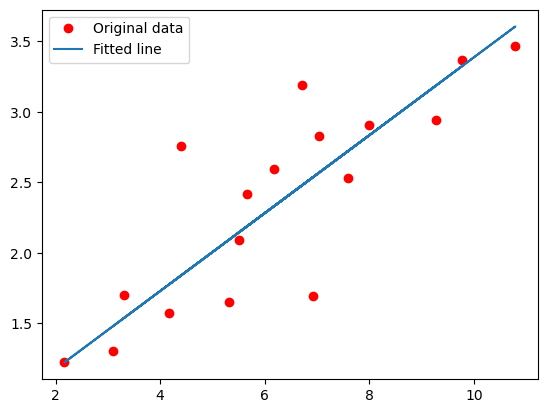

In [35]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()

## Classification Example

In [32]:
# Step 1: Import necessary libraries
import tensorflow as tf
# from tensorflow.keras import layers, models
from tensorflow import keras
from keras import models, layers 
import numpy as np

In [5]:
# Step 2: Load and prepare the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


In [26]:
# Step 3: Define the neural network architecture
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images to 1D array
    layers.Dense(128, activation='relu'),  # Fully connected layer with 128 units and ReLU activation
    layers.Dropout(0.2),  # Dropout layer to reduce overfitting
    layers.Dense(10, activation ='softmax')  # Output layer with 10 units (one for each digit)
])

In [27]:
# Step 4: Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [28]:
# Step 5: Train the model
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5


2023-10-04 15:05:28.048418: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 5s 2ms/step - loss: 0.2951 - accuracy: 0.9150
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1423 - accuracy: 0.9578
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1062 - accuracy: 0.9676
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0891 - accuracy: 0.9722
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0758 - accuracy: 0.9758


In [29]:
# Step 6: Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc*100:.2f}%")

313/313 - 0s - loss: 0.0735 - accuracy: 0.9767 - 494ms/epoch - 2ms/step

Test accuracy: 97.67%


In [35]:
# choose an index
sample_index = 24 

sample = np.expand_dims(test_images[sample_index], axis=0)  # Add batch dimension

prediction_random = model.predict(sample)

1/1 [==============================] - 0s 19ms/step


In [36]:
predicted_class = np.argmax(prediction_random)
print(f"Predicted class: {predicted_class}")

Predicted class: 4
